# Time serie regression analysis

In this post we will see a regression analysis over weather station data and reanalysis data. We downloaded NOAA NCEP data from here and station from here. The data bases from the station can be downloaded here.

Regression analysis goal is to test if there are a linear relationship between two variables. In this case we want to test if simulated data in the reanalysis process represents in a acceptable manner the observed data over a geographical point. 

Normally regression data is composed by three stepes: regression, errors analysis and hipoteses tests. 


1. Adjusting data

We want to compute the ETCCDI index for minimuns of monthly maximum daily temperatures. According with ETCCDI, this index is defined as TXn. 

Using a regression, we want adjust a line between the observed data and simulated data. In a perfect simulation we would have an 45º degrees fitted line, what 

In [9]:
import pandas as pd
path = 'data/'
ini = '1996-01-01'
end = '2016-11-30'
locations = ['BARBALHA']

stations = pd.read_csv(path + 'station_tmax_BARBALHA.csv', index_col=0, parse_dates=True)
reanalysis = pd.read_csv(path + 'noaa_reanalysis_tmax_BARBALHA.csv', index_col=0, parse_dates=True)


Taking a look in the data loaded

In [11]:
stations

,BARBALHA
1996-01-01,33.2
1996-01-02,34.4
1996-01-03,34.3
1996-01-04,33.9
1996-01-05,34.9
1996-01-06,33.8
1996-01-07,32.5
1996-01-08,32.7
1996-01-09,33.1
1996-01-10,34.7


In [106]:
reanalysis

,BARBALHA
1996-01-01,26.250031
1996-01-02,25.050018
1996-01-03,26.850006
1996-01-04,26.250031
1996-01-05,26.750031
1996-01-06,25.450012
1996-01-07,24.250031
1996-01-08,25.649994
1996-01-09,25.450012
1996-01-10,27.250031


Now, we must to reframe this daily data once the index definition wants "the monthly minimum of daily maximum". So, using pandas again, we resampled daily data using 'm' option and gets its minimum  monthly value

In [21]:
TXn_station = stations.resample('m').min()
TXn_reanalysis = reanalysis.resample('m').min()

In [22]:
TXn_station

,BARBALHA
1996-01-31,25.3
1996-02-29,26.9
1996-03-31,28.0
1996-04-30,28.1
1996-05-31,26.6
1996-06-30,27.7
1996-07-31,25.5
1996-08-31,28.4
1996-09-30,31.1
1996-10-31,30.1


In [23]:
TXn_reanalysis

,BARBALHA
1996-01-31,24.149994
1996-02-29,23.950012
1996-03-31,24.050018
1996-04-30,23.649994
1996-05-31,24.350006
1996-06-30,23.950012
1996-07-31,25.350006
1996-08-31,25.350006
1996-09-30,29.450012
1996-10-31,27.750031


Ploting time series

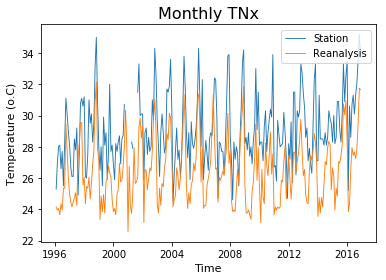

In [32]:
import matplotlib.pyplot as plt
plt.plot(TXn_station, label = 'Station', linewidth=0.9)
plt.plot(TXn_reanalysis, label = 'Reanalysis', linewidth=0.9)
name = 'Monthly TNx'
plt.ylabel("Temperature (o.C)", fontsize=11)
plt.xlabel("Time", fontsize=11)
plt.title(name, fontsize=16)
plt.legend(bbox_to_anchor=[1, 0.9], loc='right')

plt.grid(False)
plt.show()


2. Now it is time to do a regression perse. Lets use pandas 

In [98]:
from statsmodels.formula.api import ols

# Adjusting data
data = pd.concat([a,b], axis=1).dropna().values
data = DataFrame(dict(x = data[:,0], y = data[:,1]))
model = ols("y ~ x", data).fit()

In [100]:
 model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     260.8
Date:                Fri, 09 Jun 2017   Prob (F-statistic):           2.92e-40
Time:                        18:10:18   Log-Likelihood:                -430.86
No. Observations:                 243   AIC:                             865.7
Df Residuals:                     241   BIC:                             872.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1765      1.197      5.994      0.000       4.818       9.535
x              0.6631      0.041     16.151      0.000       0.582       0.744
==============================================================================
Omnibus:                        2.618   Durbin-Watson:                   1.231
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.999
Skew:                           0.044   Prob(JB):                        0.368
Kurtosis:                       2.565   Cond. No.                         381.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finally, ploting the fitted rule and data

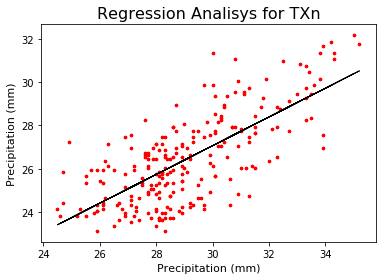

In [103]:
plt.scatter(a, b,  color='red', s=6)
plt.plot(data['x'], model.predict(), color='black',  linewidth=0.8)
name = 'Monthly TNx'
labelName = 'T (o.C)'
labelName = 'Precipitation (mm)'
plt.title("Regression Analisys for TXn" , fontsize=16)
plt.ylabel(labelName, fontsize=11)
plt.xlabel(labelName, fontsize=11)
plt.show()
